<a href="https://www.kaggle.com/code/nicoelbert/ais22-w05-data-visualization?scriptVersionId=97214266" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*Analytical Information Systems*

# Worksheet 5 - Data Visualization

Matthias Griebel<br>
Nico Elbert <br>
Lehrstuhl für Wirtschaftsinformatik und Business Analytics

SS 2022

***
# Table of Contents

* [1. Recap: Data Visualization](#dataviz)
    * [1.1. Graphical Excellence](#gex)
    * [1.2. Introduction to ggplot2](#ggplot)
    * [1.3. Choosing Plots and Aesthetic Elements](#choose)
* [2. Exercises](#exercises)
    * [2.1. Changing tides of european footballing power](#football)
    * [2.2. Exam Questions](#exam)    
*** 

__Credits__

- John Burn-Murdoch, Financial Times http://johnburnmurdoch.github.io

- "R for Data Science" by Garrett Grolemund and Hadley Wickham
    - Chapter 3: [Data Visualisation](https://r4ds.had.co.nz/data-visualisation.html)
    - Chapter 7: [Exploratory Data Analysis](https://r4ds.had.co.nz/exploratory-data-analysis.html)
    
    
## 1. Recap: Data Visualization<a id="dataviz"></a>
    
**Why use Data Visualization?**

The depiction of information using spatial or graphical representations, to facilitate comparison, pattern recognition, change detection, and other cognitive skills by making use of the visual system.

- Problem 
    - Big datasets: How to understand them?
- Solution
    - Take better advantage of human perceptual system
    - Convert information into a graphical representation.
- Issues
    - How to convert abstract information into graphical form?
    - Do visualizations do a better job than other methods?


### 1.1. Graphical Excellence and Integrity<a id="gex"></a>

__Graphical Excellence__

Excellence in statistical graphics consists of complex ideas communicated with clarity, precision, and efficiency

Graphical Displays should show the data and...

- induce the viewer to think about the substance
- avoid distorting what the data says
- present many numbers in small space
- make large data sets coherent
- encourage the eye to compare different pieces of data
- reveal the data at several levels of detail, from a broad overview to the new structure
- serve a reasonably clear purpose: description, exploration, tabulation, or decoration

__Graphical Integrity__

Concpet of Graphical Integrity states :

- The representation of numbers should be directly proportional to the quantities represented 
- Clear, detailed, and thorough labeling should be used to defeat graphical distortion and ambiguity
- Show data variation, not design variation
- Use deflated and standardized units of monetary measurement in time-series displays of money, 
- The number of information-carrying dimensions depicted should not exceed the number of dimensions in the data.
- Graphics must not quote data out of context. 

__Example for graphical excellence__

Goal-Contribution Matrix for the Premier League! Special focus on Eden Hazard, Jamie Vardy, Glen Murray, and Ryan Fraser ([Link](https://twitter.com/r_by_ryo/status/1129773418184925184?s=12)/[Code](https://gist.github.com/Ryo-N7/67ca1c364c342a82c4098918082ca445)).

<img src="https://pbs.twimg.com/media/D63BjrRXoAAdbZi.png:large">



__Data Ink Ratio__

https://www.youtube.com/watch?v=qhkiMX8zbDE&ab_channel=IBCS


## 1.2. Introduction to ggplot2<a id="ggplot"></a>

<img src="https://ggplot2.tidyverse.org/logo.png" width="200">
 
`ggplot2` is an R-package for declaratively creating graphics. `ggplot2` makes it easy to quickly experiment with:

- Different ways of encoding data in shape, space and colour
- Small multiples vs multiple series
- Display ratios
- Layering visual elements



**The Evolution of a ggplot**

<img src="https://d33wubrfki0l68.cloudfront.net/1e7033393a2c70dc1255c5d0f1c563e945519251/61035/img/evol-ggplot/evol-ggplot-1.gif">

[Source](https://www.cedricscherer.com/2019/05/17/the-evolution-of-a-ggplot-ep.-1/)
                                                                                                                                            

The `ggplot2` package lets you make beautiful and customizable plots of your data. 

- one of the core members of the tidyverse
- based on the __grammar of graphics__, the idea that you can build every graph from the same components:
    - a data set
    - a coordinate system
    - geoms - visual marks that represent data points
    
    
Cheatcheat
[![Cheatcheat](https://raw.githubusercontent.com/rstudio/cheatsheets/master/pngs/thumbnails/data-visualization-cheatsheet-thumbs.png)](https://raw.githubusercontent.com/rstudio/cheatsheets/main/data-visualization.pdf)

A `ggplot2` graph consists of the following compenents.

```R
ggplot(data = <DATA> ) +
    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>),stat=<STAT>,position=<POSITION>)+
    (opt) <COORDINATE_FUNCTION> + 
    (opt) <FACET_FUNCTION> +
    (opt) <SCALE_FUNCTION> + 
    (opt) <THEME_FUNCTION>
``` 

Let's complete the template below to build a graph of the the relationship between `carat`and `price`in the `diamonds`data:

In [1]:
library(tidyverse); theme_set(theme_minimal())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


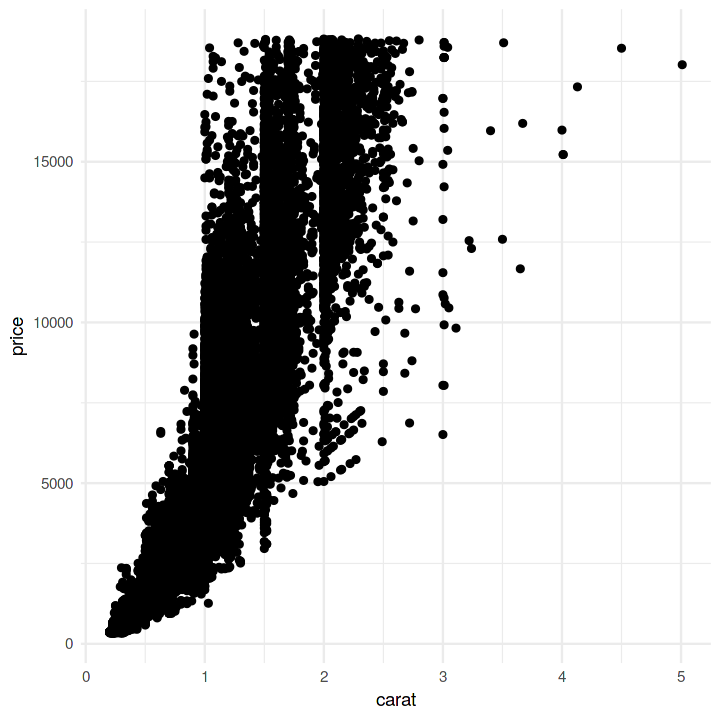

In [3]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = carat, y = price))

__Controlling plots in Jupyter Notebooks__

You can control the size and quality of plots. 
- Use `options(repr.* = ...)` and `getOption('repr.*')` to set and get them, respectively.
- Example: adjust width and heigth
```R
options(repr.plot.width=7, repr.plot.height=7)
```

[Documentation](https://www.rdocumentation.org/packages/repr/versions/0.7/topics/repr-options)

### 1.3. Choosing Plots and Aesthetic Elements<a id="choose"></a>

<img src="https://raw.githubusercontent.com/wi3jmu/AIS_2019/master/notebooks/images/03/taxonomy.png" width="700">

**Comparison**

***Columns Charts***

If you want the heights of the bars to represent values in the data, use `geom_col()`. 

In [4]:
diamonds %>%
    group_by(cut) %>%
    summarize(avgprice = mean(price))

cut,avgprice
<ord>,<dbl>
Fair,4358.758
Good,3928.864
Very Good,3981.760
Premium,4584.258
Ideal,3457.542


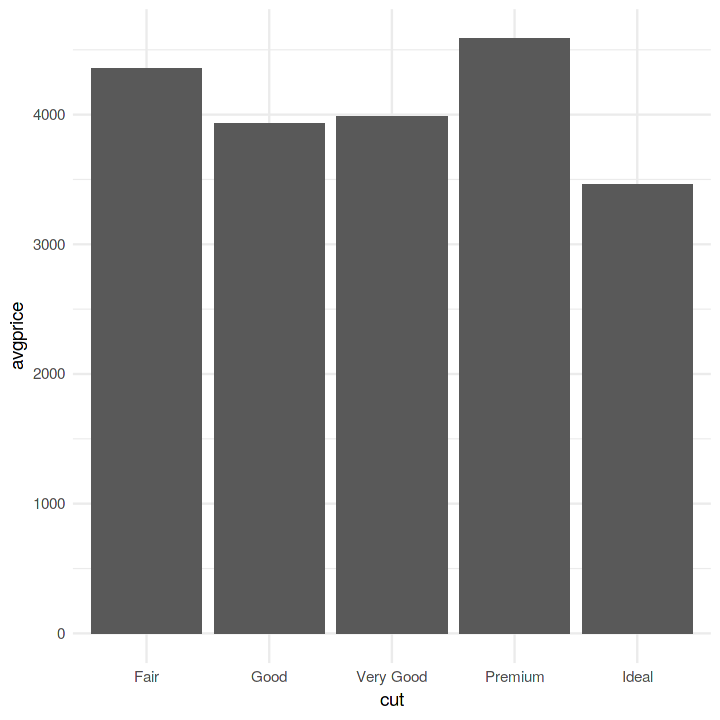

In [5]:
diamonds %>%
    group_by(cut) %>%
    summarize(avgprice = mean(price)) %>%
    ggplot() + 
      geom_col(mapping = aes(x = cut, y = avgprice))

There's plenty of unused (uninformative) space in the chart, so let's change the width of the bars:

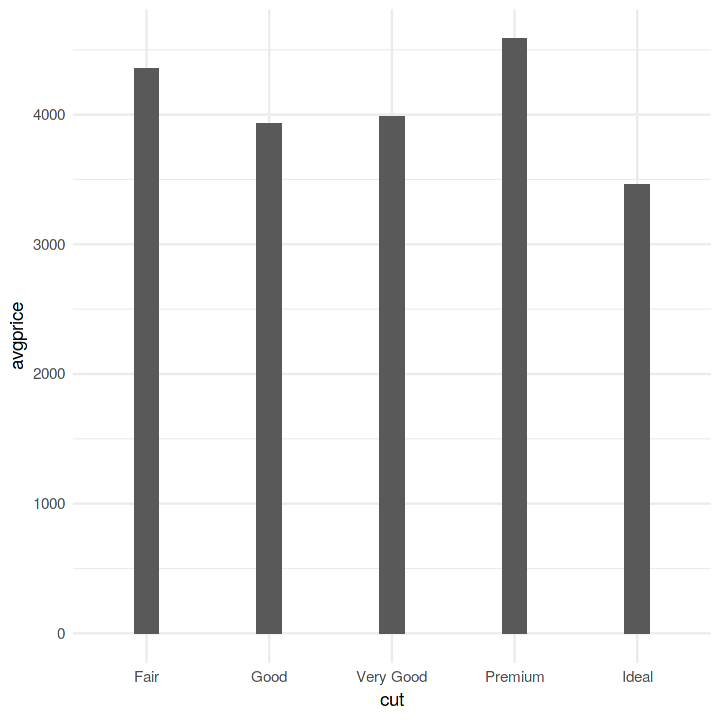

In [6]:
diamonds %>%
    group_by(cut) %>%
    summarize(avgprice = mean(price)) %>%
    ggplot() + 
      geom_col(mapping = aes(x = cut, y = avgprice), width=0.2)

This chart contains the same information:

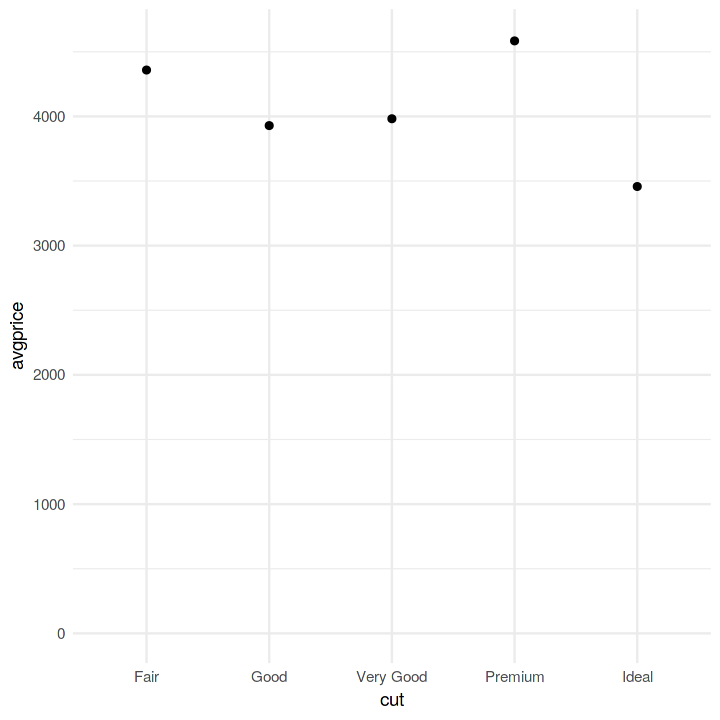

In [7]:
diamonds %>%
    group_by(cut) %>%
    summarize(avgprice = mean(price)) %>%
    ggplot() + 
      geom_point(mapping = aes(x = cut, y = avgprice))+
      ylim(c(0, 4600))

Finding an explanation (avgprice low for ideal cut) is not easy!

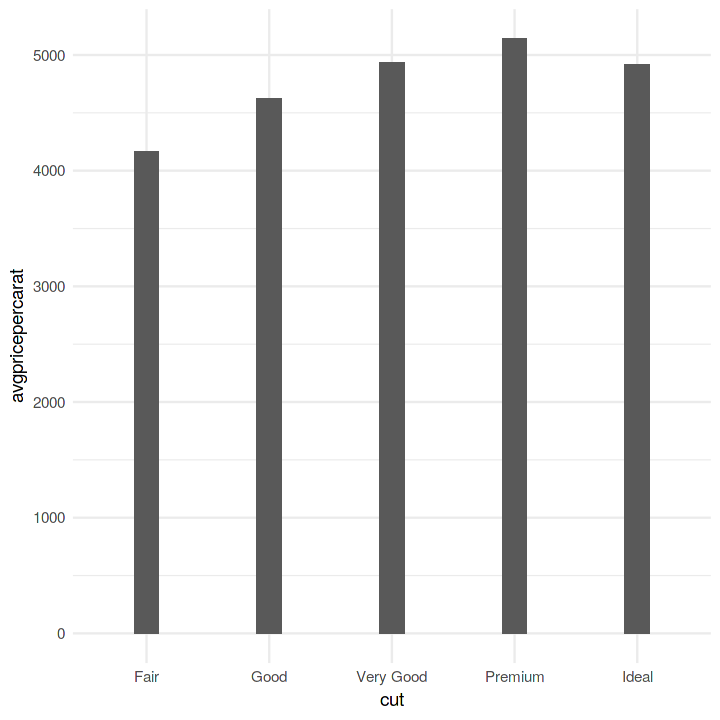

In [8]:
diamonds %>%
    group_by(cut) %>%
    summarize(avgpricepercarat = mean(price)/mean(carat)) %>%
    ggplot() + 
      geom_col(mapping = aes(x = cut, y = avgpricepercarat), width=0.2)

Clarity as explanation?

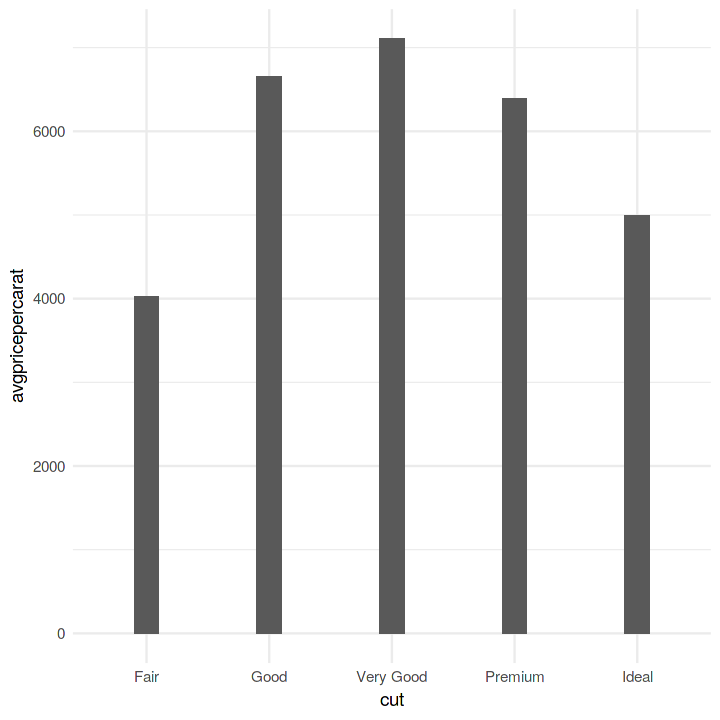

In [9]:
diamonds %>%
    filter(clarity == "IF") %>%
    group_by(cut) %>%
    summarize(avgpricepercarat = mean(price)/mean(carat)) %>%
    ggplot() + 
      geom_col(mapping = aes(x = cut, y = avgpricepercarat), width=0.2)

**Composition**

***Bar chart***

To examine the counts of different classes of a categorical variable, use a bar chart:

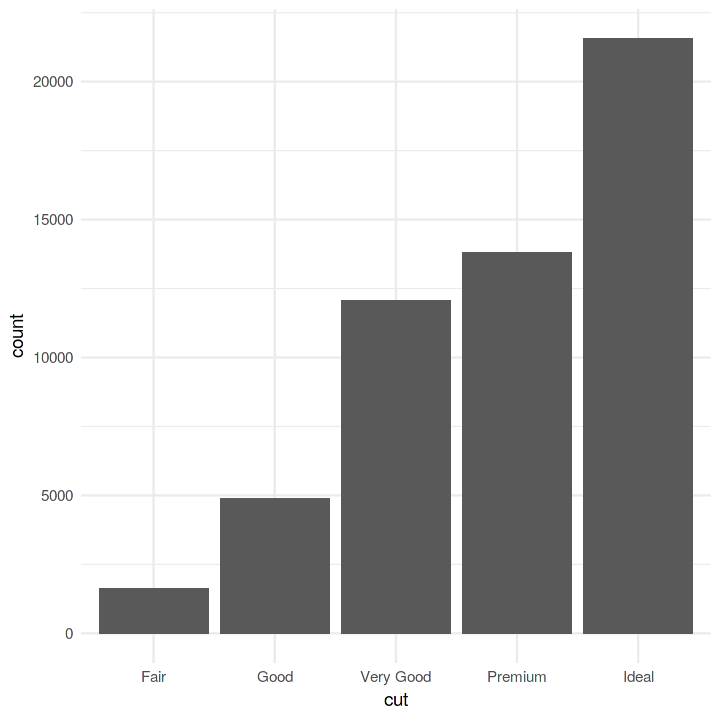

In [10]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut))

The algorithm used to calculate new values for a graph is called a stat, short for statistical transformation. The figure below describes how this process works with geom_bar().

<img src="https://raw.githubusercontent.com/wi3jmu/AIS_2019/master/notebooks/images/03/visualization-stat-bar-2.png" style="width:80%">

__Why Pie Charts do not help here?__

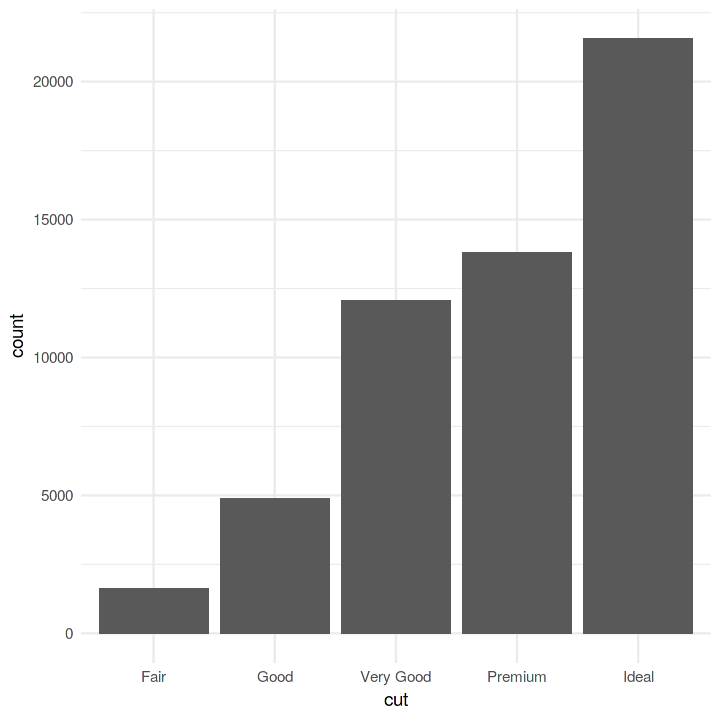

In [11]:
diamonds %>%
  group_by(cut) %>%
  summarise(count = n()) -> diamonds_count
diamonds_count %>%
  ggplot() + 
  geom_col(mapping = aes(x = cut, y=count))

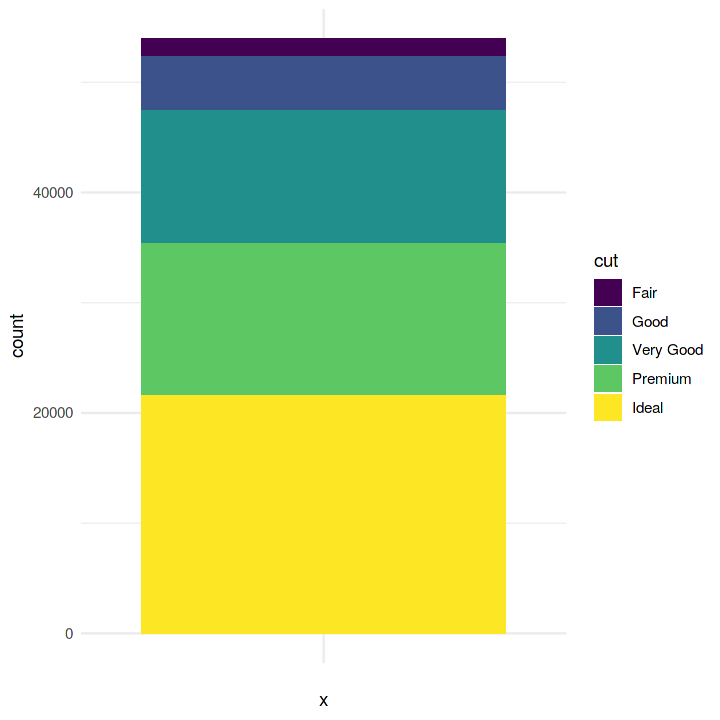

In [12]:
diamonds_count %>%
  ggplot() + 
  geom_col(mapping = aes(x = "", y=count, fill=cut))

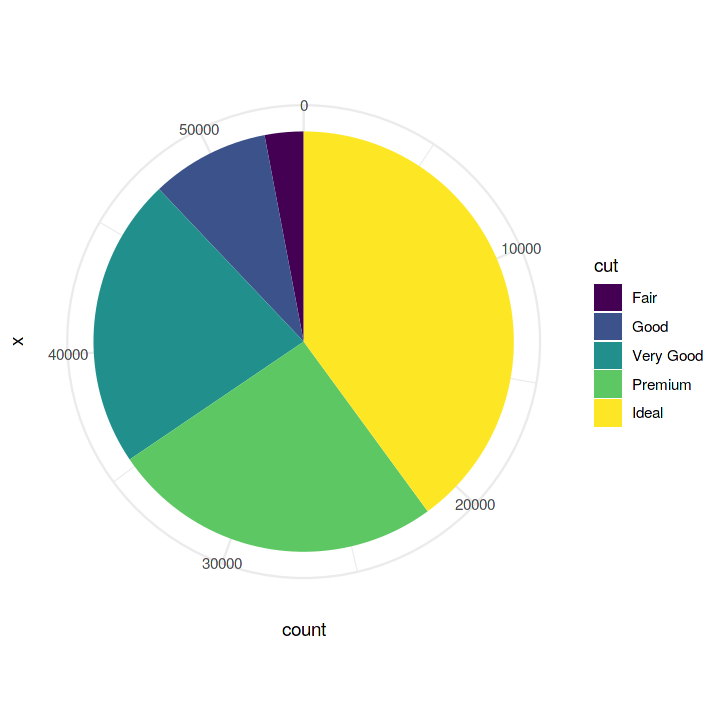

In [13]:
diamonds_count %>%
  ggplot() + 
  geom_col(mapping = aes(x = "", y=count, fill=cut)) + 
  coord_polar('y')

***Stacked Bar chart***

To examine the composition (with respect to other categorical variables) of the different classes of a categorical variable, we use a stacked bar chart:

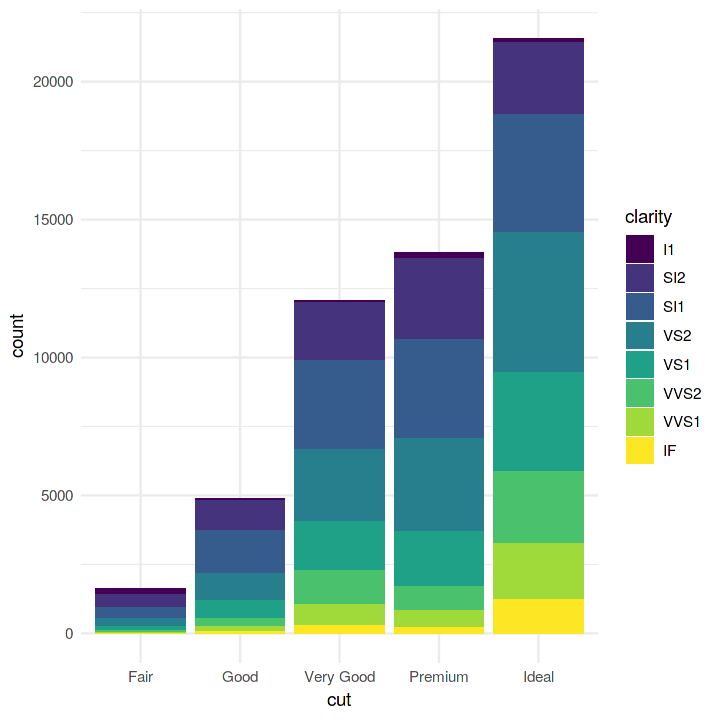

In [14]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity))

__100% Stacked Bar chart__

To focus exclusively on the composition (with respect to other categorical variables) of the different classes of a categorical variable, we use a 100% stacked bar chart:

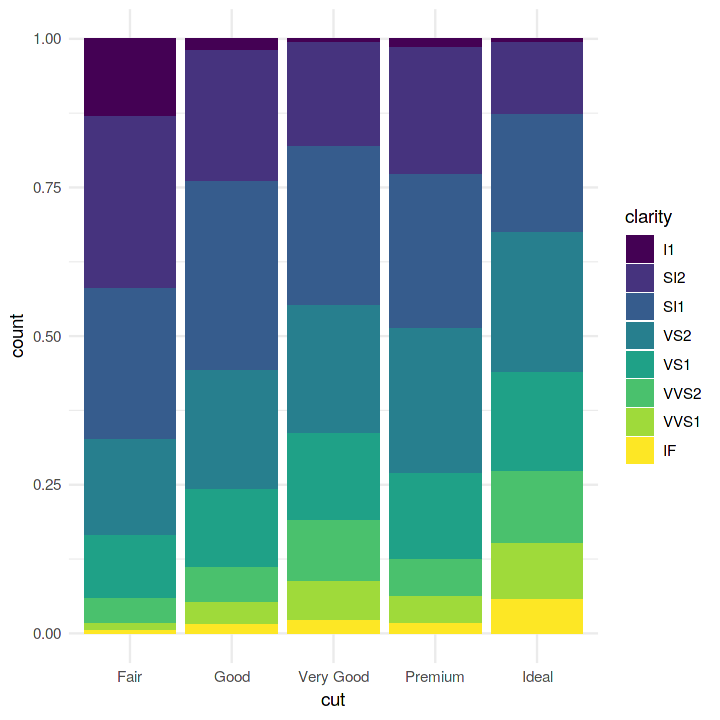

In [15]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position="fill")

### Distributions

How you visualize the distribution of a variable will depend on whether the variable is categorical or continuous. A variable is categorical if it can only take one of a small set of values. In R, categorical variables are usually saved as factors or character vectors. 

*Histograms*

To examine the distribution of a continuous variable, use a histogram. A histogram divides the x-axis into equally spaced bins and then uses the height of a bar to display the number of observations that fall in each bin. 

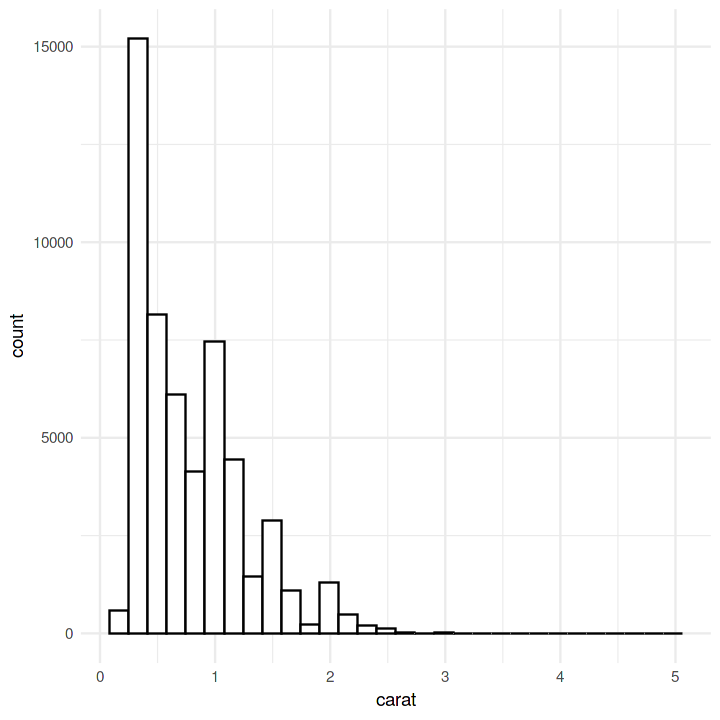

In [16]:
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = carat), bins = 30, color="black", fill="white")

**Smoothed density estimates*

`geom_density` computes and draws kernel density estimate, which is a smoothed version of the histogram. This is a useful alternative to the histogram for continuous data that comes from an underlying smooth distribution.

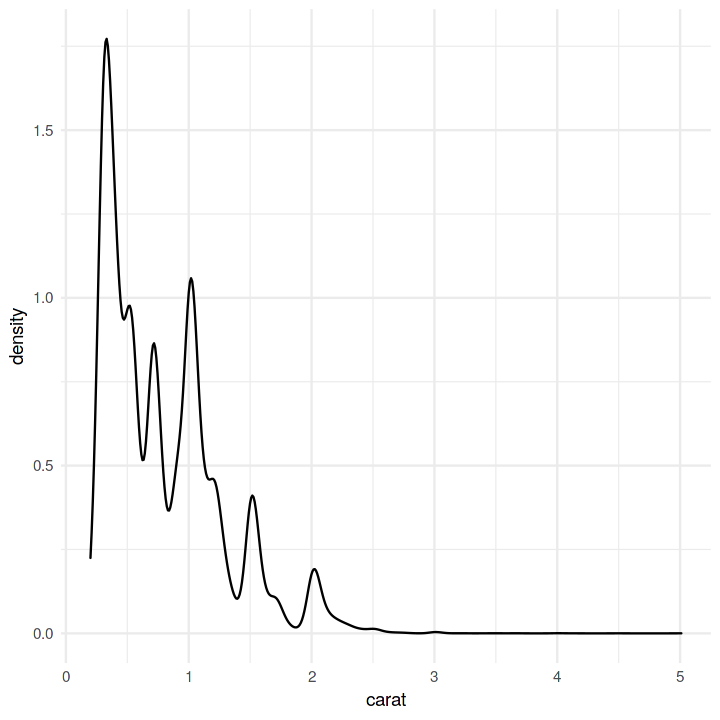

In [17]:
ggplot(data = diamonds) +
  geom_density(mapping = aes(x = carat))

__Boxplots__

You can use boxplots to display the distribution of a continuous variable broken down by a categorical variable.

- Concise way to illustrate the standard quantiles, shape, and outliers of data
- Each “box” is created according to some standard composition rules

<img src="https://raw.githubusercontent.com/wi3jmu/AIS_2019/master/notebooks/images/03/eda-boxplot.png" width="700">

[Source](https://r4ds.had.co.nz/exploratory-data-analysis.html)


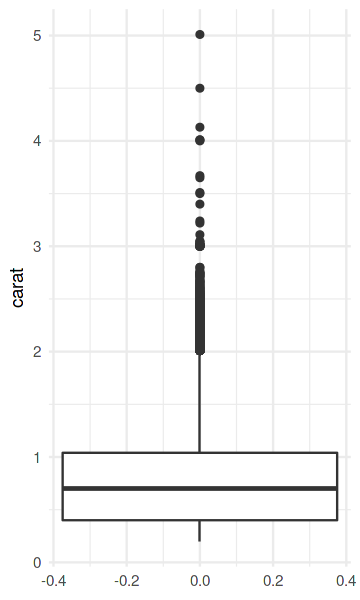

In [18]:
options(repr.plot.width=3, repr.plot.height=5)
ggplot(data = diamonds) +
  geom_boxplot(mapping = aes(y=carat))

__Comparing Distributions__

It’s common to want to explore the distribution of a continuous variable broken down by a categorical variable

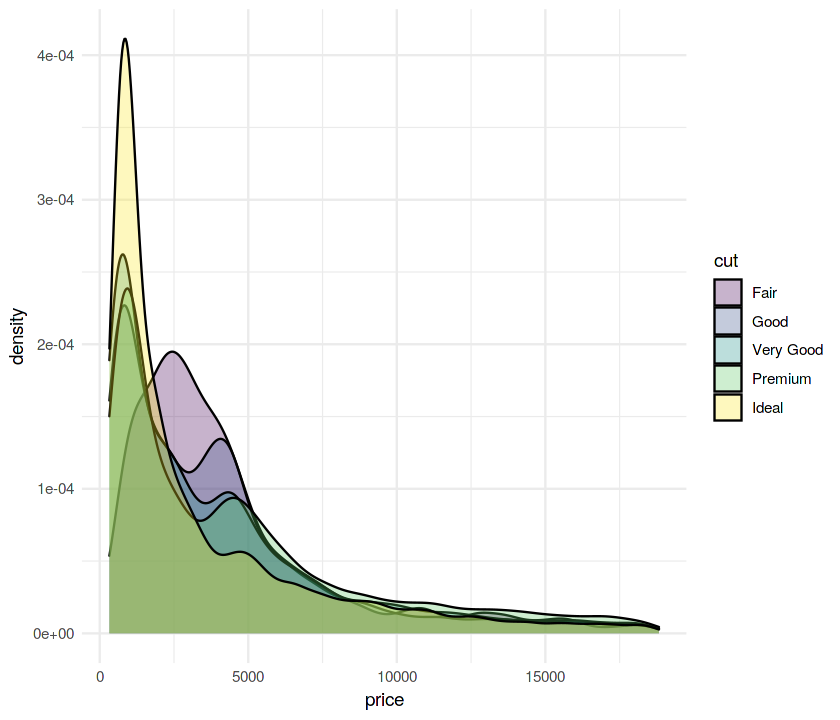

In [19]:
options(repr.plot.width=7, repr.plot.height=6)
ggplot(data = diamonds, mapping = aes(fill = cut, x = price), position="identity") +
  geom_density(alpha=0.3)

...better use ***boxplots***!

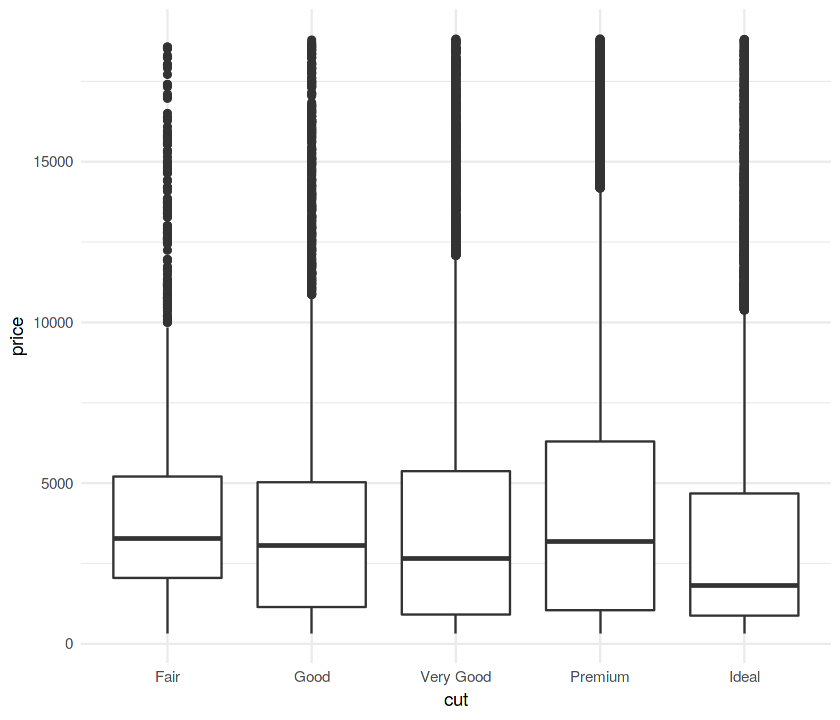

In [20]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot()

If the descriptions on the x-Axis do not fit well, flip the coordinates

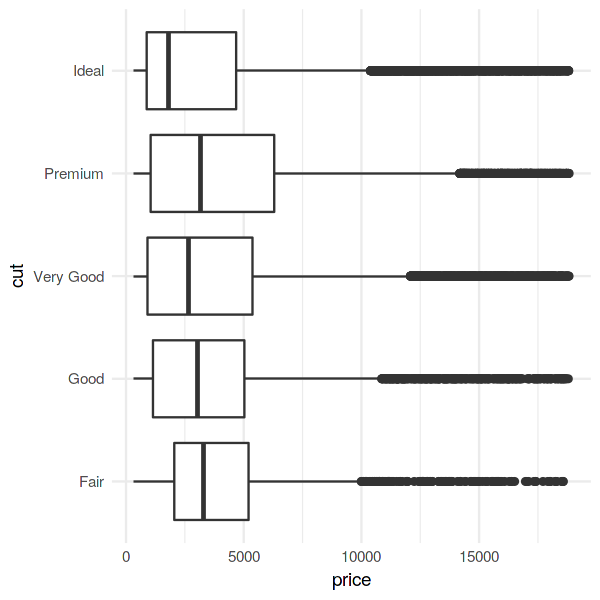

In [21]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot() + coord_flip()

### Relationships

If variation describes the behavior within a variable, covariation describes the behavior between variables. Covariation is the tendency for the values of two or more variables to vary together in a related way. The best way to spot covariation is to visualise the relationship between two or more variables. How you do that should again depend on the type of variables involved.

***Relationship between two continuous variables***

Using a scatterplot with two variables you can see covariation as a pattern in the points. You can see an exponential relationship between the carat size and price of a diamond.

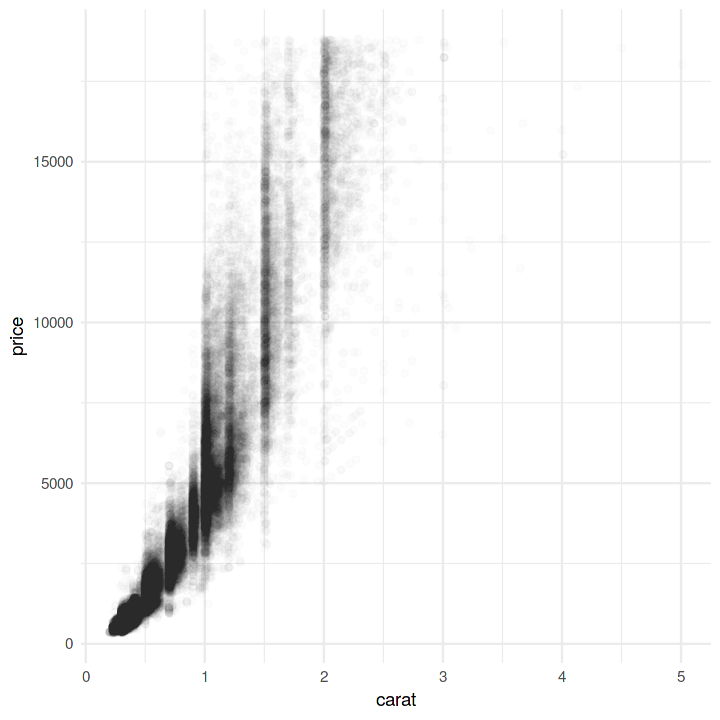

In [22]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(data = diamonds) + 
  geom_point(mapping = aes(x = carat, y = price), alpha = 1 / 100)

***Two categorical variables***

To visualise the covariation between categorical variables, you’ll need to count the number of observations for each combination

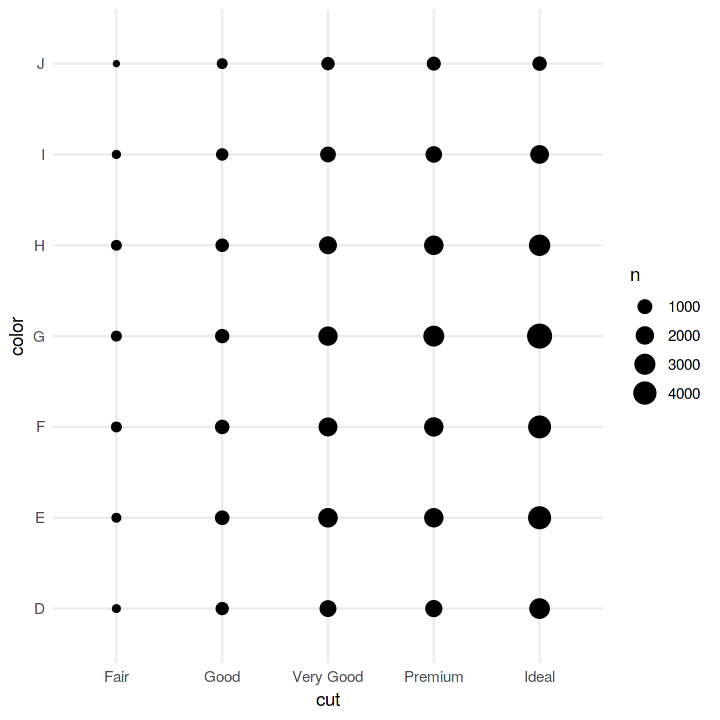

In [23]:
ggplot(data = diamonds) +
  geom_count(mapping = aes(x = cut, y = color))

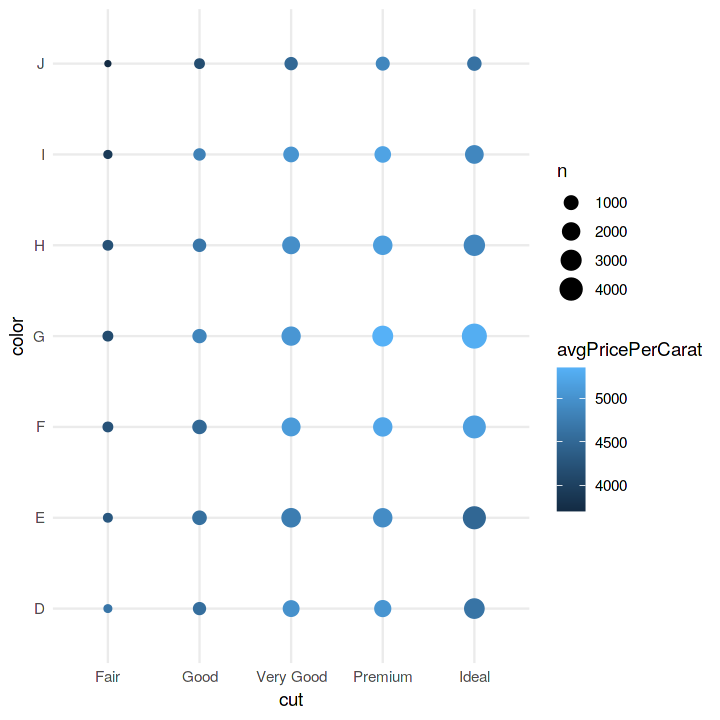

In [24]:
diamonds %>%
    group_by(cut, color) %>%
    mutate(avgPricePerCarat = mean(price)/mean(carat)) %>%
    ggplot() +
      geom_count(mapping = aes(x = cut, y = color, color = avgPricePerCarat))

### Coloring

__Continuous data:__
- differences between your steps should be high enough
    - Sequential palettes (single hue vs multiple hues)
    - Diverging palettes which emphasize extremes

__Qualitative data:__
- find colors which go well together and attract the reader’s eye
    - Qualitative palettes
    
__RColorBrewer for color palettes__

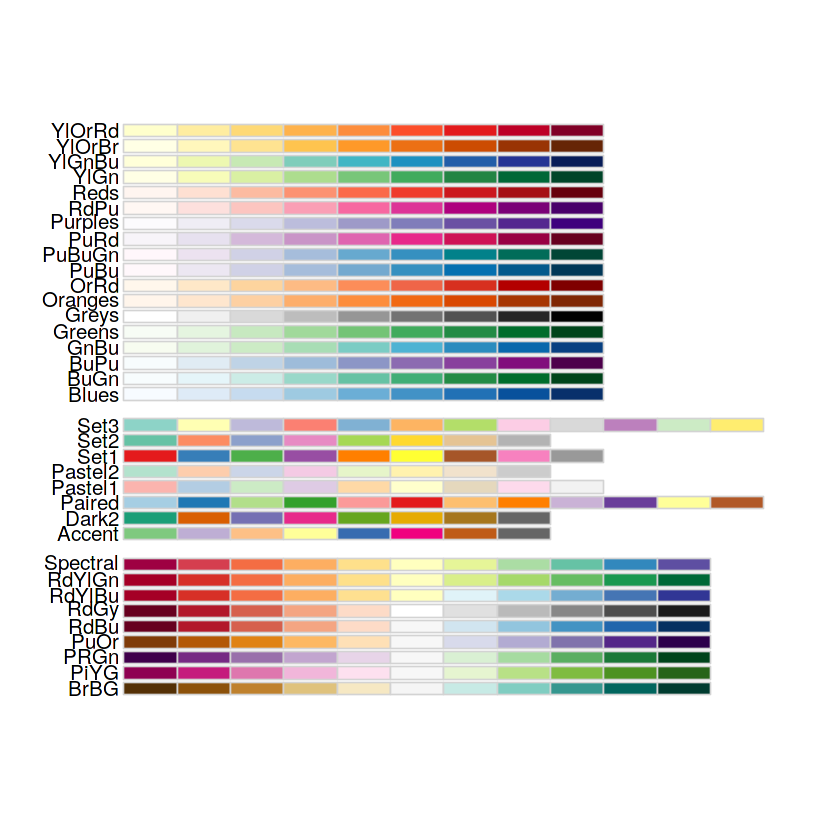

In [25]:
options(repr.plot.width=7, repr.plot.height=7)
RColorBrewer::display.brewer.all(n=NULL, type="all", select=NULL, exact.n=TRUE, colorblindFriendly=FALSE)

__Using color palettes on the `diamonds`data__

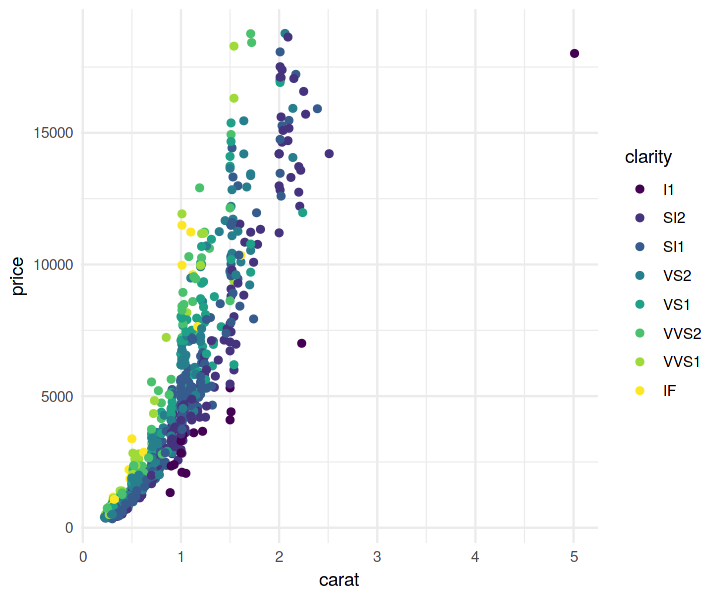

In [26]:
options(repr.plot.width=6, repr.plot.height=5)
diamonds %>% 
    sample_n(1000) %>%
    ggplot(aes(carat, price)) +
    geom_point(aes(colour = clarity)) -> d
d

Select brewer palette to use - Sequential

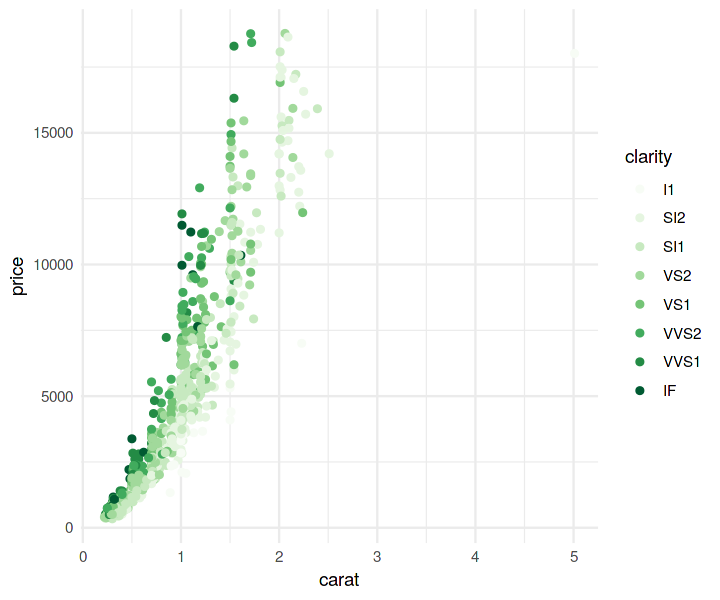

In [27]:
d + scale_colour_brewer(palette = "Greens")

Select brewer palette to use - Qualitative

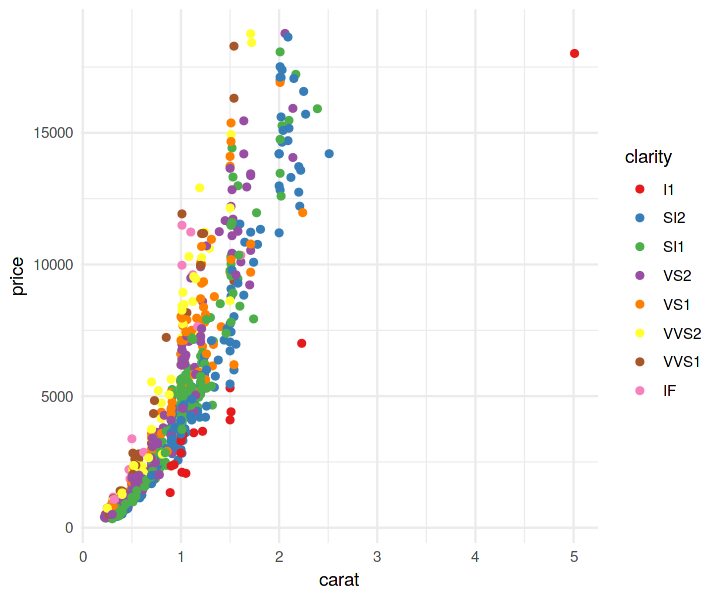

In [28]:
d + scale_colour_brewer(palette = "Set1")

`scale_fill_brewer` works just the same as `scale_colour_brewer` but for fill colours

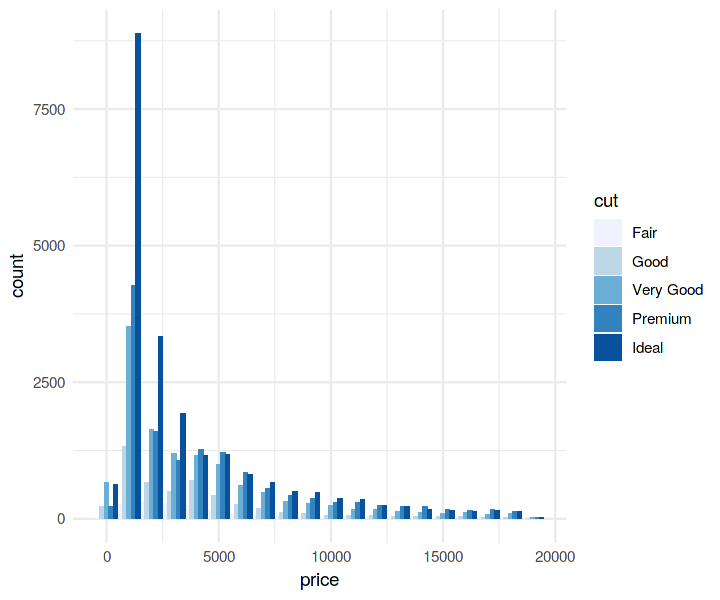

In [29]:
diamonds %>%
    ggplot(aes(x = price, fill = cut)) +
    geom_histogram(position = "dodge", binwidth = 1000) -> p
p + scale_fill_brewer(palette="Blues")

The direction of colors can be reversed

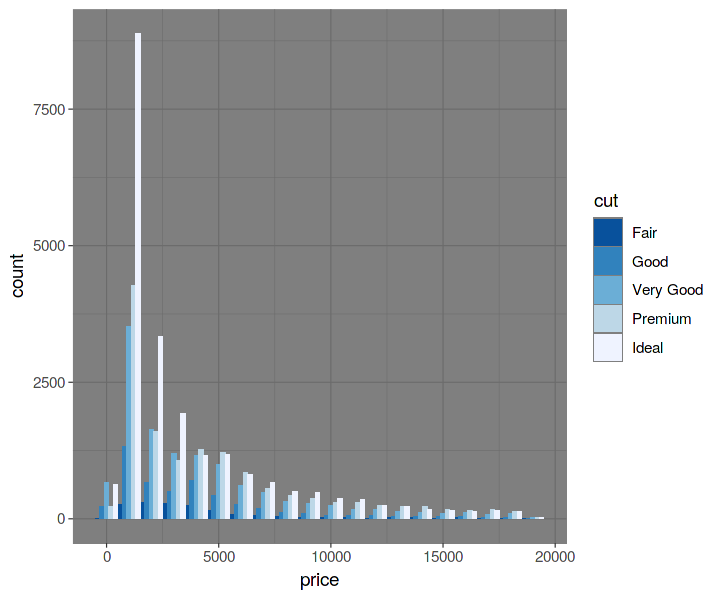

In [30]:
p + scale_fill_brewer(direction = -1) + theme_dark()

### Faceting

One way to add additional variables is with aesthetics. Another way, particularly useful for categorical variables, is to split your plot into facets, subplots that each display one subset of the data.

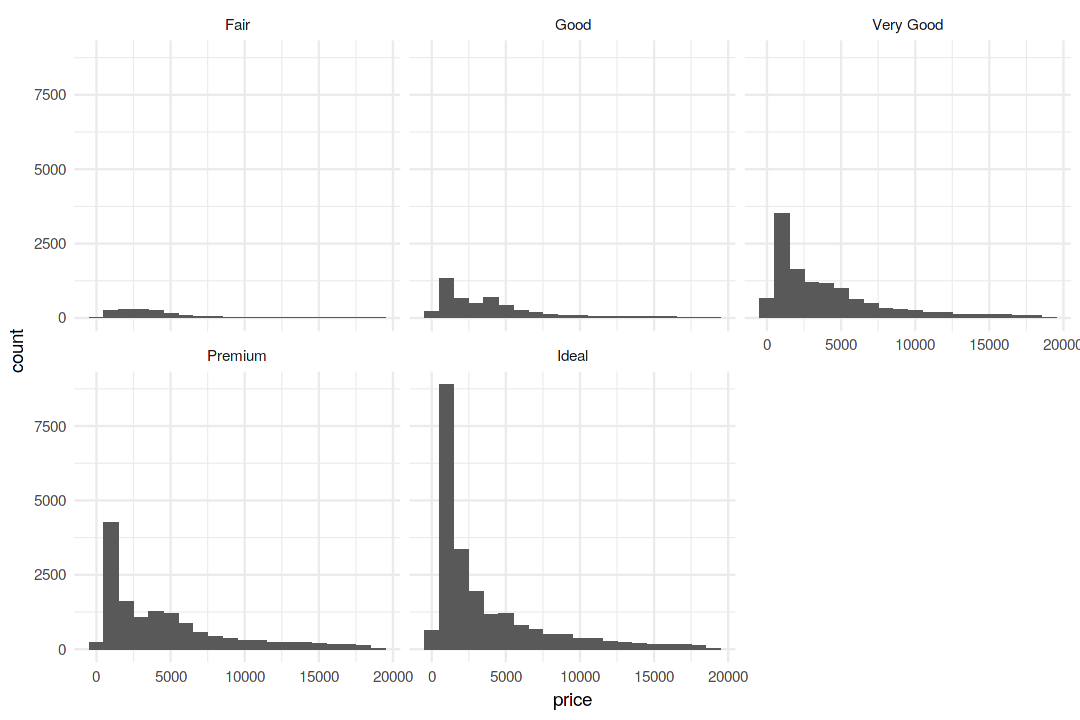

In [31]:
options(repr.plot.width=9, repr.plot.height=6)
diamonds %>%
    ggplot(aes(x = price)) +
    geom_histogram(binwidth = 1000) + 
    facet_wrap(~cut)

## 2. Exercises<a id="exercises"></a>



***From exam SS 2018 Question 2: Descriptive Analytics***

* (a) (2 points) Identify and explain the major graphical integrity issue in the following plot. Briefly discuss the data-ink ratio considering the principles of graphical excellence

<img src="https://user-images.githubusercontent.com/30658685/170355050-6483ab48-c7aa-4d13-8041-ec8e436a97e7.png" width="700" />

In [32]:
# Write your answer here
# The representation of numbers, as physically measured on the surface of the graphic itself, 
# should be directly proportional to the numerical quantities represented.

* (b) (3 points) Identify and briefly explain the major graphical integrity issue in the graph of the following tweet and how it could be fixed. Discuss whether or not the statement in the tweet is supported by the graph

<img src="https://user-images.githubusercontent.com/30658685/170355180-7a2c19b9-6441-49ed-814d-51f7556f2628.png" width="700" />

In [33]:
# Write your answer here
# Graphical Integrity Issue: Clear, detailed, and thorough labeling should
# be used to defeat graphical distortion and ambiguity. Write out explanations of
# the data on the graphic itself. Label important events in the data.

(c) ***Plots*** In the lecture we discussed how graphs and color palettes should reflect the
underlying data types. Recommend a suitable graph type, color palette, and data
transformation choice to effectively visualize the following data sets for a Covid-19
Dashboard in Germany. Be specific about axes labels and scale. [Note: sometimes
you may not necessarily need a transformation or color]

    (i) (2 points) The relationship between the absolute number of current cases, the 7-day-incidence and hospitalization rate for 35 counties in Baden-Wuerttemberg, categorized into four administrative districts.
<img src="https://user-images.githubusercontent.com/13711052/171426002-47db1480-f37f-49ec-be5d-1b0deaea196a.png" width="600" />
# Write your answer here


In [34]:
# Write your answer here
# Bubblechart - absolute number of current cases, the 7-day-incidence
# and hospitalization rate in the 3 available dimensions, a qualitative color
# palette for the different administrative regions and text labels for the different counties

In [35]:
#mock data
cov19_data <- data.frame(district=rep(c("Tübingen", "Stuttgart" , "Karlsruhe", "Freiburg"), each=3),
                 county=rep(c('A', 'B', 'C'), times=4),
                 cases=round(runif(12, 3000, 5000),0),
                 incidence = round(runif(12, 500,1500),0),
                 hospitalization = round(runif(12, 2,8),1)) %>%
                     mutate(county_label = paste(substr(district,0,2),county))
   
cov19_data

district,county,cases,incidence,hospitalization,county_label
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>
Tübingen,A,3124,1211,7.1,Tü A
Tübingen,B,3008,1054,3.9,Tü B
Tübingen,C,3642,1221,7.4,Tü C
Stuttgart,A,3308,600,6.2,St A
Stuttgart,B,4275,1393,7.3,St B
Stuttgart,C,4400,1340,2.8,St C
Karlsruhe,A,3968,935,3.4,Ka A
Karlsruhe,B,3261,1107,4.4,Ka B
Karlsruhe,C,4115,1183,5.0,Ka C


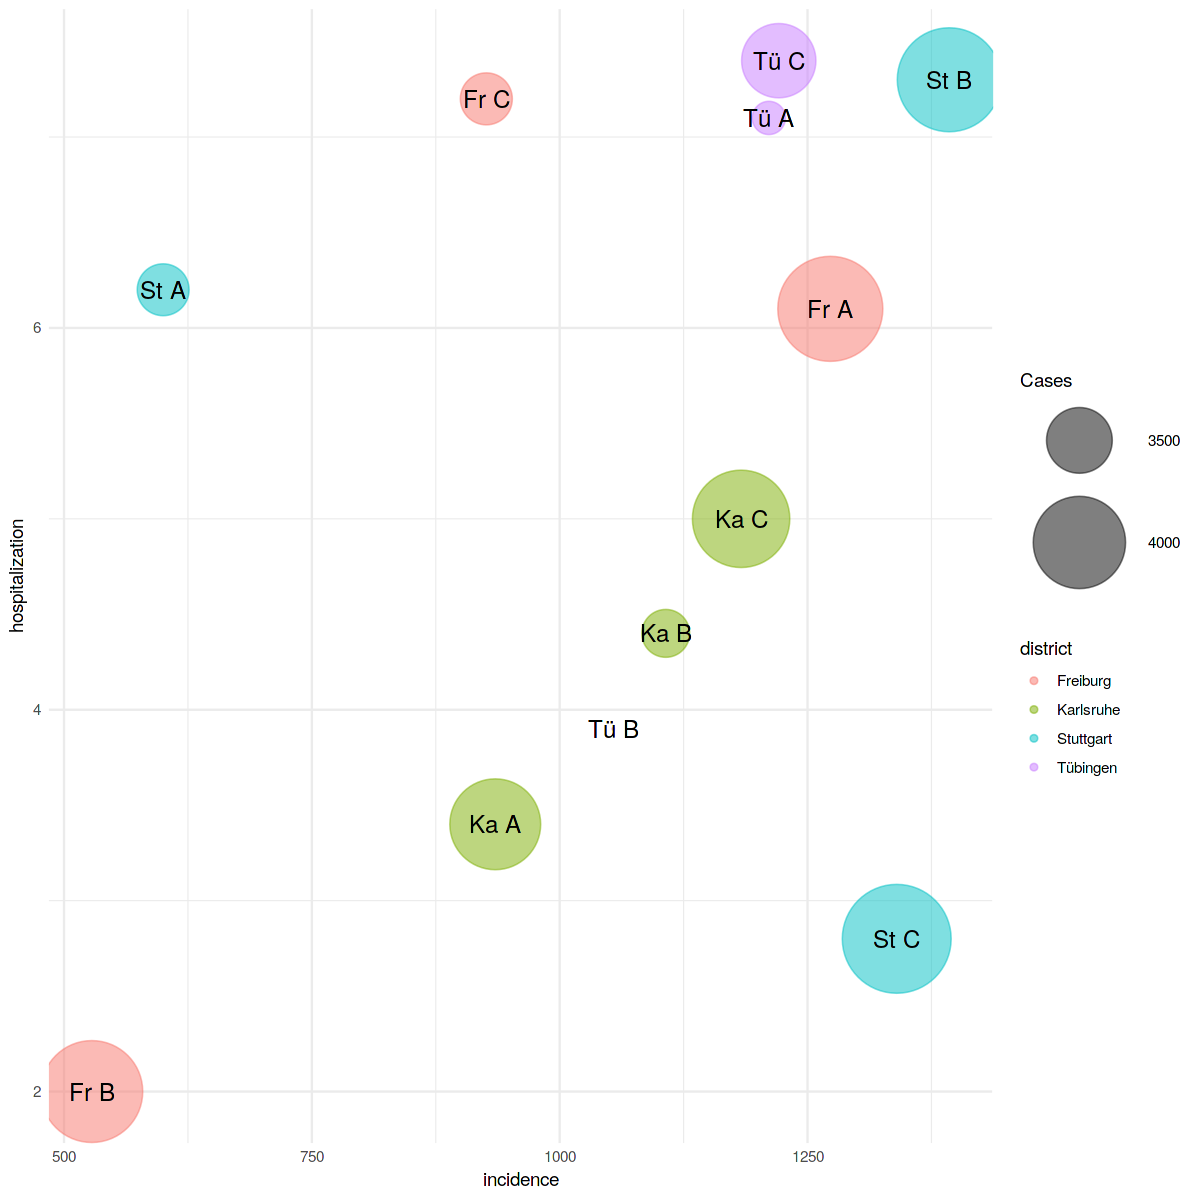

In [36]:
# Write your code here
options(repr.plot.width=10, repr.plot.height=10)
cov19_data %>%
  ggplot(aes(x=incidence, y=hospitalization, size=cases, color=district, label = county_label)) +
    geom_point(alpha=0.5) +
    scale_size(range = c(.1, 30), name="Cases") + geom_text( aes(label=county_label), nudge_y= 0, nudge_x= 0, size = 5,color= "black")

(ii) (2 points) Relative shares of 7-day-incidence groups (counties with 7-day-incidences of 0-50, 50-100, 100-200 and 200+) on a daily basis, from the start of the pandemic until today.

<img src="https://user-images.githubusercontent.com/13711052/171426064-70164a66-b415-4803-90c3-4093b3b31e40.png" width="400" />

Plotting the solution using ggplot2 (___not___ in exam) and discuss the plot and its parameter. You will the data from the rki website scraped and transformed in the 2 cells below.

In [37]:
#rki data p1

library(readxl)
library(httr)
library(readxl)

#download parameters
url<-'https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Fallzahlen_Kum_Tab_aktuell.xlsx?__blob=publicationFile'
destfile <- 'rki_data.xlsx'
method <- 'auto'


#XLS Parameter
sheet <- 'LK_7-Tage-Fallzahlen (fixiert)'
range <- 'A5:IP417'

download.file(url, destfile, method, quiet = FALSE, mode = "w",
              cacheOK = TRUE,
              extra = getOption("download.file.extra"))


incidence_df <- read_excel(destfile,sheet = sheet,range = range)
incidence_df %>% head

LK,LKNR,11.09.2021,12.09.2021,13.09.2021,14.09.2021,15.09.2021,16.09.2021,17.09.2021,18.09.2021,⋯,07.05.2022,08.05.2022,09.05.2022,10.05.2022,11.05.2022,12.05.2022,13.05.2022,14.05.2022,15.05.2022,16.05.2022
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LK Ahrweiler,7131,283,278,265,277,257,238,235,211,⋯,578,496,496,558,506,493,465,447,447,447
LK Aichach-Friedberg,9771,85,104,99,99,94,118,104,107,⋯,1020,1020,1020,1086,1028,1014,952,922,922,922
LK Alb-Donau-Kreis,8425,135,125,118,118,116,123,124,132,⋯,897,785,725,836,804,772,755,757,677,620
LK Altenburger Land,16077,31,35,37,33,29,30,30,35,⋯,225,188,169,215,171,163,169,151,138,108
LK Altenkirchen,7132,150,138,151,161,160,146,127,121,⋯,679,679,679,648,609,573,560,569,569,569
LK Altmarkkreis Salzwedel,15081,11,14,14,14,17,21,20,21,⋯,433,433,433,413,449,354,313,309,309,309


In [38]:
#rki data p2

#create thresholds
thresholds <- list(5,50,100,200,1000000000)
t_vals <- vector(mode="list", length=length(thresholds))
names(t_vals) = thresholds[1:5]

#count values in bins per day
for(col in 3:ncol(incidence_df)) {  # for-loop over columns
    last_threshold <- 0
    for(i in 1:length(thresholds)){
        #reset values
        t <- thresholds[i]
        count <- 0
    
        for(row in 1:nrow(incidence_df)){
            if (incidence_df[row, col] <= t & incidence_df[row, col] > last_threshold){
                count <- count + 1
            }
        } 
        last_threshold <- t #update threshold
        t_vals[[i]] <- c (t_vals[[i]],count)
    }

}

#get dates
dates <- colnames(incidence_df)[0:-2]
dates <- as.Date(dates, "%d.%m.%Y")

#create df
agg_incidence_df <- data.frame(date=rep(dates,times=5), category = rep(c('0-5','5-50','50-100','100-200','200+'), each = length(dates)),value = c(t_vals[[1]], t_vals[[2]] ,t_vals[[3]], t_vals[[4]], t_vals[[5]]))

#correct cat order 
agg_incidence_df$category <- factor(agg_incidence_df$category, levels = c('0-5','5-50','50-100','100-200','200+'))

head(agg_incidence_df)

,date,category,value
,<date>,<fct>,<dbl>
1,2021-09-11,0-5,1
2,2021-09-12,0-5,1
3,2021-09-13,0-5,1
4,2021-09-14,0-5,1
5,2021-09-15,0-5,1
6,2021-09-16,0-5,1


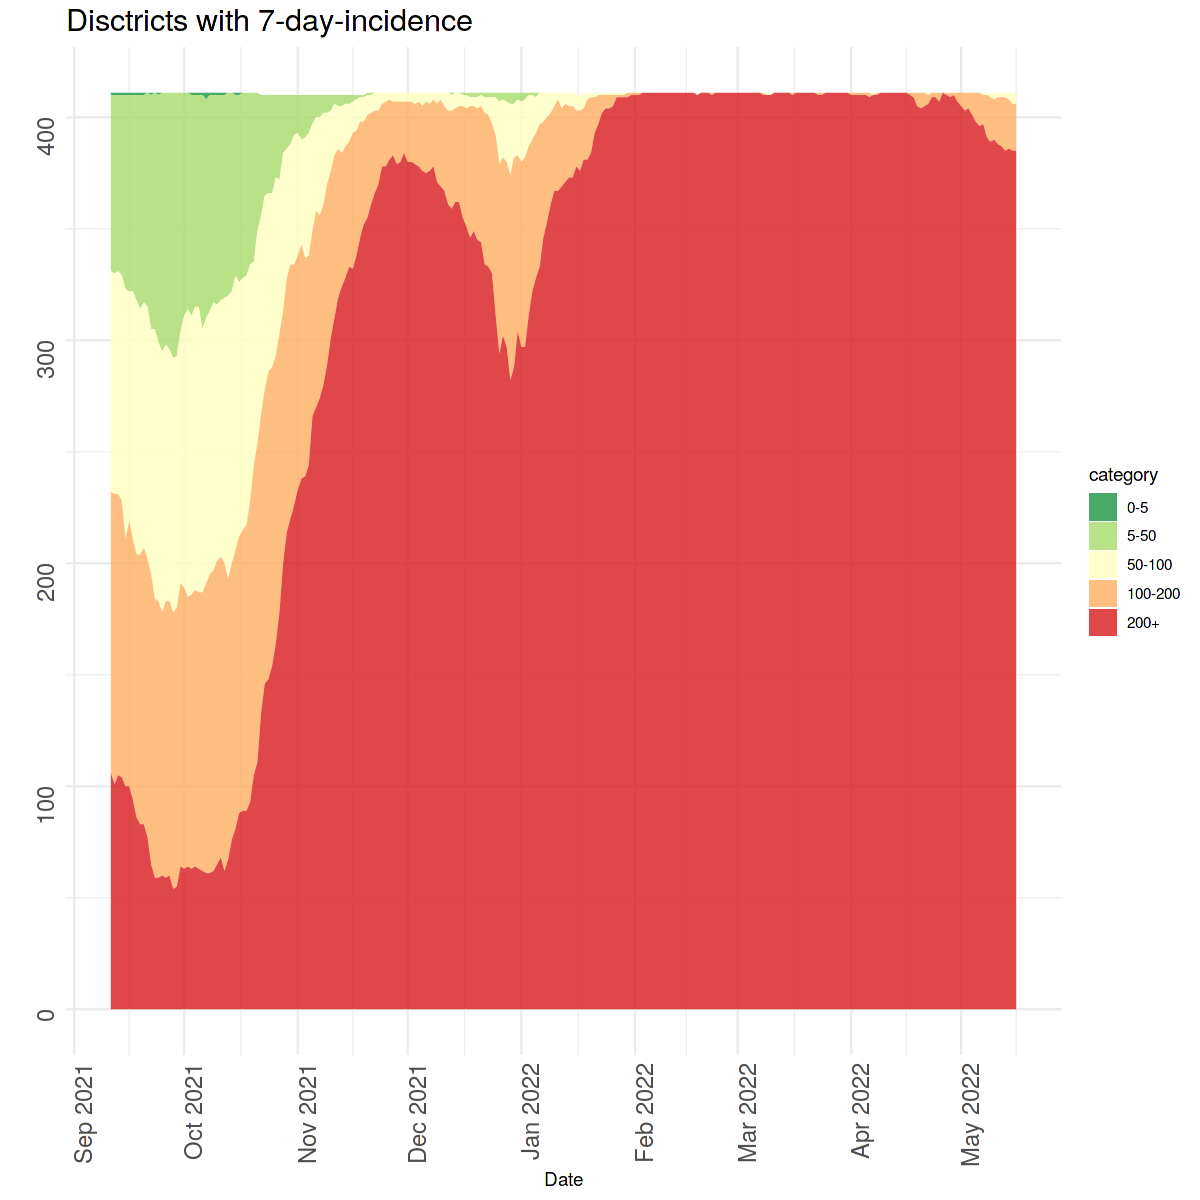

In [39]:
# Write your code here
ggplot(arrange(agg_incidence_df), aes(x=date,y=value,group = category, fill = category)) + 
    geom_area(alpha = 0.8) +
    theme(axis.text = element_text(angle = 90, hjust = 1, size=14), plot.title = element_text(size=18, family="bold")) +
    scale_fill_brewer(palette="RdYlGn", direction=-1) + 
    ggtitle("Disctricts with 7-day-incidence") + 
    labs(x = "Date", y="") + scale_x_date(date_breaks = "1 month", date_labels =  "%b %Y") 

***From exam WS 2018/19 Question 2: Descriptive Analytics***

(b) (3 Points) __Color palettes__: In the lecture we discussed that color palettes should reflect the underlying data types. Recommend a suitable palette choice for the following data sets:

i. (1 points) Daily stock performance measured as percent change

In [40]:
# Write your answer here
# Diverging

ii. (1 points) Annual sales data of a single company

In [41]:
# Write your answer here
# Sequential

iii. (1 points) Monthly earnings data of a single company

In [42]:
# Write your answer here
# Diverging

iv. (1 points) Distinguishing different companies in stock price charts

In [43]:
# Write your answer here
# Qualitative

v. (1 points) Points in AIS exam achieved by students ranging from 0 to 60

In [44]:
# Write your answer here
# Sequential

vi. (1 points) Coloring countries on a map based on the population's favorite sport

In [45]:
# Write your answer here
# Qualitative

***From exam SS 2018 Question 2: Descriptive Analytics***

(a) (4 points) __Plots and Colors__ In the lecture, you learned about different types of visualizations. Additionally, we talked about color palettes. Your task is to visualize the following data sets. Which plots and color palettes do you recommend? Sketch the plots and highlight for each data set what you are trying to achieve with your visualization.

\begin{array}{|l|l|}
    \hline
    Fund ID & Performance \\
    \hline
    1         & $+7.03\%$        \\
    2         & $+3.14\%$         \\
    3         & $-1.12\%$         \\
    4         & $-5.87\%$          \\
    \dots       & \dots        \\
    \hline
\end{array}
<center>
(a) Asset Management
<center>

In [46]:
# Write your answer here

# Plot: Show distribution via column histogram (x=FundID, y=Performance)
# Color palette: diverging (negative vs. positive performance) or
# Alternatively: qualitative (FundID)

Plotting the solution using ggplot2 (___not___ in exam)

In [47]:
library(tidyverse)
asset_performance <- tribble(
  ~FundID, ~Performance,
  "1",     7.03,
  "2",     3.14,
  "3",     -1.12,
  "4",     -2.84)

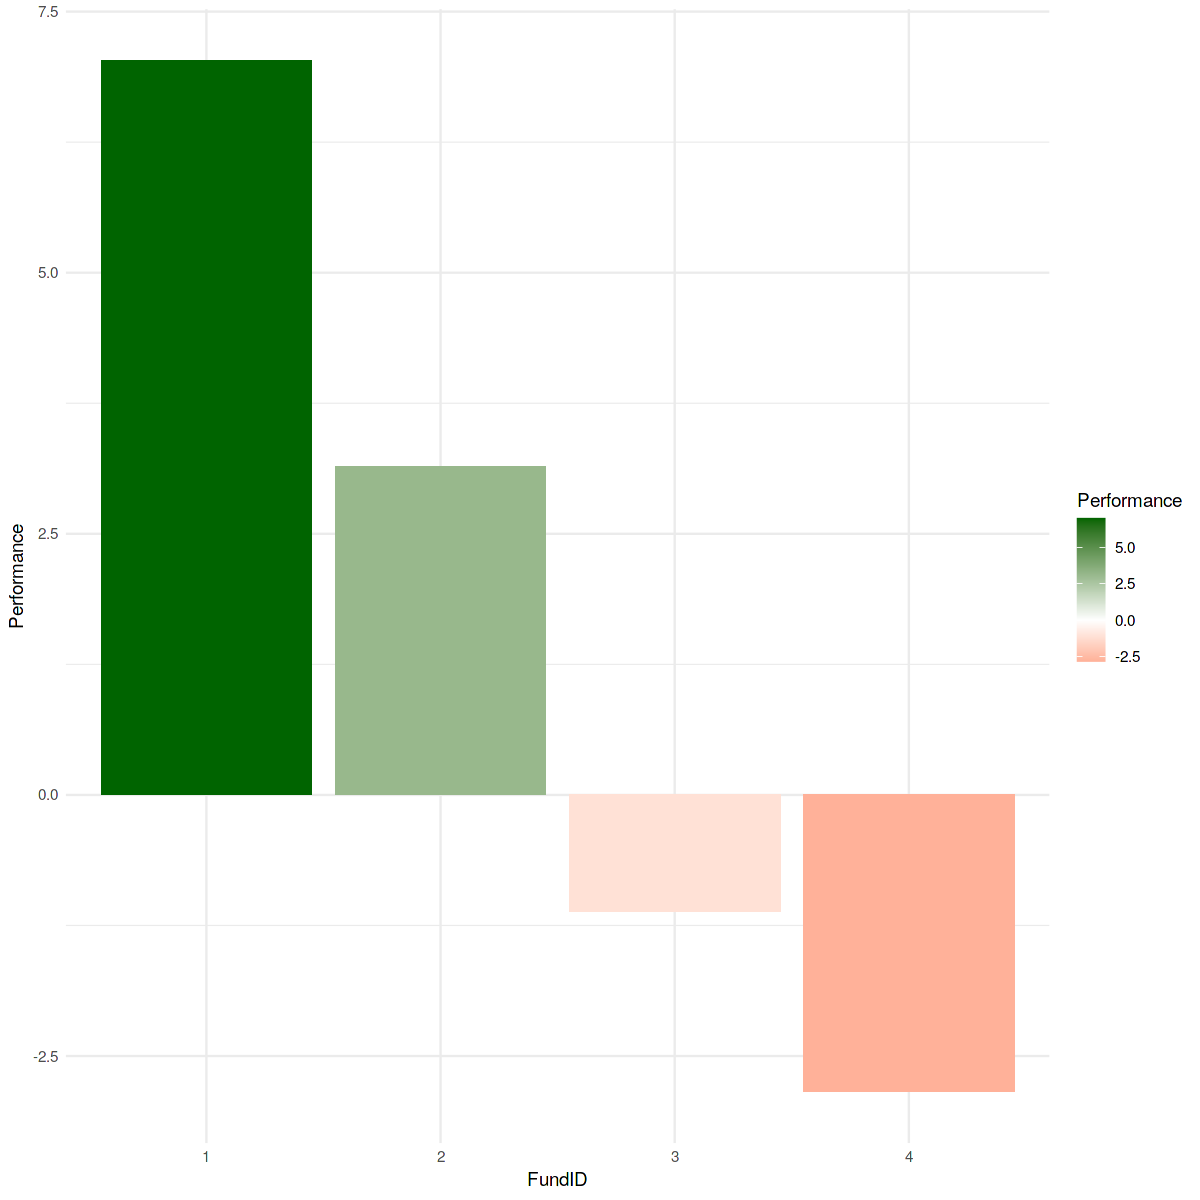

In [48]:
# Write your code here
asset_performance %>%
    ggplot() +
    geom_bar(mapping = aes(x=FundID, y=Performance,  fill=Performance), stat='identity') +
    scale_fill_gradient2(low='red', high='darkgreen', mid = 'white', midpoint = 0) + 
    theme_minimal()

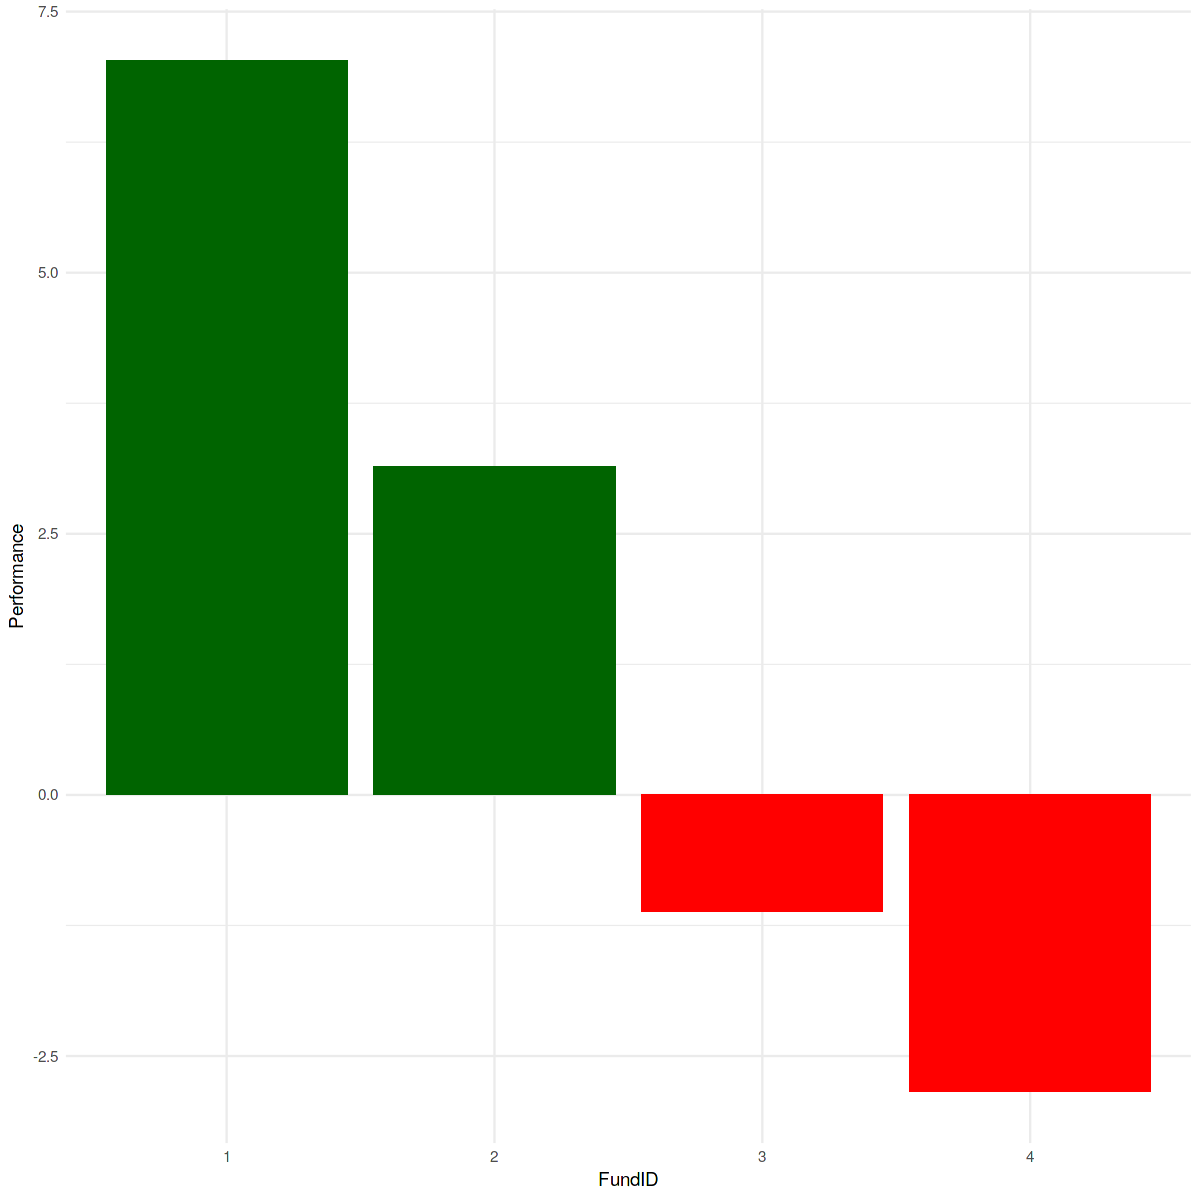

In [49]:
asset_performance %>%
    mutate(Color = if_else(Performance >= 0, "darkgreen", "red")) %>%
    ggplot() +
    geom_bar(mapping = aes(x=FundID, y=Performance,  fill=Color), stat='identity') +
    scale_fill_identity() + #use data values as visual ones
    theme_minimal()

[...] Your task is to visualize the following data sets. Which plots and color palettes do you recommend? Sketch the plots and highlight for each data set what you are trying to achieve with your visualization.

\begin{array}{|l|l|l|}
    \hline
    Employee ID & Gender & Income\\
    \hline
    1       & male      &    80,000 \\
    2       & female    &   70,000 \\
    3       & male      &   35,000 \\
    4       & female    &   37,000 \\
    \dots   & \dots           & \dots \\
    \hline
\end{array}

<center>
(b) Gender Pay Gap
<center>

In [50]:
# Write your answer here

# Plot: for comparison, e.g. boxplot (x=Gender, y=Income)
# Color palette: qualitative (Gender)

Generating sample data (___not___ in exam)

In [51]:
n=5000
tibble(EmployeeID = 1:n,
       Gender = sample(c("male","female", "diverse"), size = n, replace = T)) %>%
       mutate(Income = if_else(Gender=="female", 
                            rnorm(n = n, mean = 40000, sd = 5000),
                            rnorm(n = n, mean = 45000, sd = 10000))) -> gender
gender %>% head()

EmployeeID,Gender,Income
<int>,<chr>,<dbl>
1,male,46700.07
2,male,47665.15
3,female,48358.05
4,female,33472.91
5,diverse,30924.17
6,male,46404.86


Plotting the solution using ggplot2 (___not___ in exam)

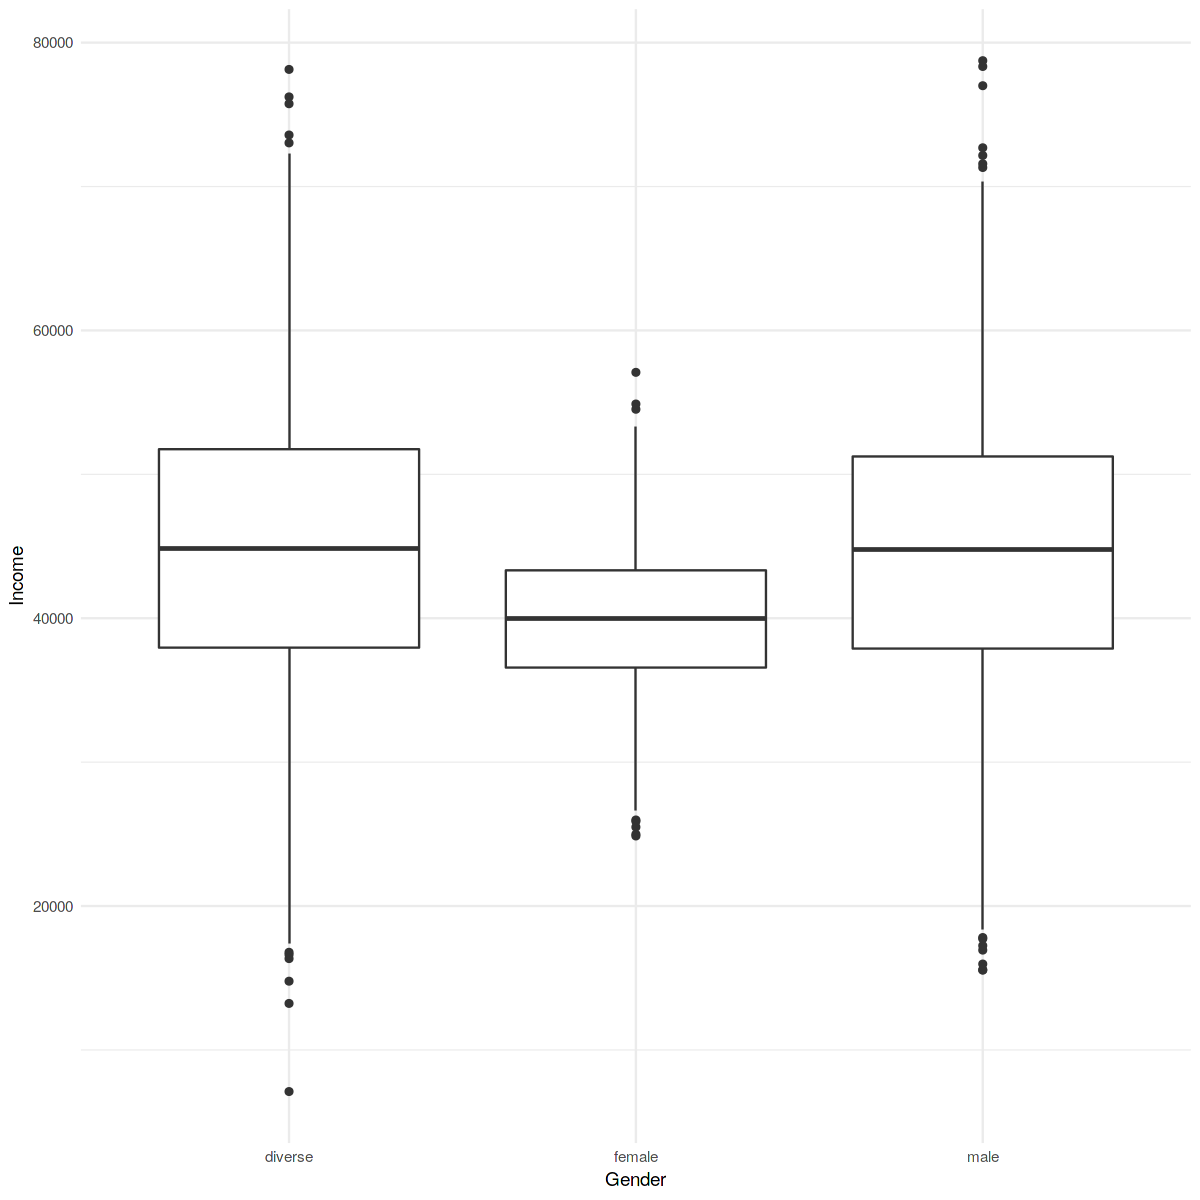

In [52]:
# Write your code here
gender %>%
    ggplot() +
    geom_boxplot(aes(x=Gender, y=Income))